In [8]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

#Define a logarithmic function to fit to the data
def plot_stuff(df, title, xlabel, ylabel):
    def func(x, a, c, d):
        return a + d*np.log(x + c)

    #Fit said function
    popt, pcov = curve_fit(func, xdata=df["AF bin"], ydata=df["Alpha"], maxfev = 100000)
    sns.scatterplot(x=df["AF bin"], y=df["Alpha"])
    xx = np.linspace(0.1, 1, 100)
    yy = func(xx, *popt)
    plt.title(title, size = 18)
    plt.xlabel(xlabel, size = 15)
    plt.ylabel(ylabel, size = 15)
    plt.plot(xx, yy)


In [2]:
v = pd.read_csv("Fixed_Pteropus_alecto.bed", sep = "\t", header = None)
v["Position"] = v[0] + ":" + v[2].astype(str)
v.columns = [0, 1, 2, "Alecto", "Vampyrus", "Rousettus", "Helvum", "PhyloP447", "NearestGene", "NearestDist", "SpecSup447", "Derived", "Position"]
v = v.drop_duplicates("Position")
v = v[["Position", "Alecto", "Vampyrus", "Rousettus", "Helvum", "PhyloP447", "NearestGene", "NearestDist", "SpecSup447", "Derived"]].copy()

v = v[v["PhyloP447"] != "."]
v = v[v["SpecSup447"] != "."]
v = v[v["NearestGene"] != "."]

v["PhyloP447"] = v["PhyloP447"].astype(float)
v["SpecSup447"] = v["SpecSup447"].astype(float)

vv = pd.read_csv("Poly_Pteropus_alecto.bed", sep = "\t", header = None)

vv["Position"] = vv[0] + ":" + vv[2].astype(str)
vv.columns = [0, 1, 2, "MajorAllele", "MinorAllele", "MAFMaxAcrossAncestry", "AlectoReference", "Vampyrus", "Rousettus", "Helvum", "PhyloP447", "NearestGene", "NearestDist", "SpecSup447", "DerivedAllele", "UnfoldedMAF", "Position"]
vv = vv.drop_duplicates("Position")
vv = vv[["Position", "MajorAllele", "MinorAllele", "MAFMaxAcrossAncestry", "AlectoReference", "Vampyrus", "Rousettus", "Helvum", "PhyloP447", "NearestGene", "NearestDist", "SpecSup447", "DerivedAllele", "UnfoldedMAF"]].copy()

vv = vv[vv["PhyloP447"] != "."]
vv = vv[vv["SpecSup447"] != "."]
vv = vv[vv["NearestGene"] != "."]

vv["PhyloP447"] = vv["PhyloP447"].astype(float)
vv["SpecSup447"] = vv["SpecSup447"].astype(float)

v = v[v["Derived"].isin(["AlectoDerived"])]
vv = vv[~vv["DerivedAllele"].isin(["Amb"])]
vv = vv[~vv["UnfoldedMAF"].isin(["Amb"])]
vv["UnfoldedMAF"] = vv["UnfoldedMAF"].astype(float)

v.index = v["Position"]
vv.index = vv["Position"]

v = v[~v["Position"].isin(vv["Position"])]

vv = vv[(vv["UnfoldedMAF"] < 0.9) & (vv["UnfoldedMAF"] > 0.1)]

C:\Users\astar\AppData\Local\Temp\ipykernel_13780\1022093705.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("Fixed_Pteropus_alecto.bed", sep = "\t", header = None)
C:\Users\astar\AppData\Local\Temp\ipykernel_13780\1022093705.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  vv = pd.read_csv("Poly_Pteropus_alecto.bed", sep = "\t", header = None)


In [3]:
#Remove HLA locus
toss = []
for i in np.unique(vv["NearestGene"]):
    if "HLA-" in i:
        toss.append(i)
        
for i in np.unique(v["NearestGene"]):
    if "HLA-" in i:
        toss.append(i)

v = v[~v["NearestGene"].isin(toss)]
vv = vv[~vv["NearestGene"].isin(toss)]

In [4]:
#Specifically chosen because of it is number of bats + 8
vv = vv[vv["SpecSup447"] > 38]
v = v[v["SpecSup447"] > 38]

In [5]:
v[v["NearestDist"] != 0]

,Position,Alecto,Vampyrus,Rousettus,Helvum,PhyloP447,NearestGene,NearestDist,SpecSup447,Derived
Position,,,,,,,,,,
KB030219:31678,KB030219:31678,T,C,C,T,-0.411,CD1E,4144,178.0,AlectoDerived
KB030219:31681,KB030219:31681,A,T,T,T,-0.166,CD1E,4141,179.0,AlectoDerived
KB030219:31682,KB030219:31682,C,T,T,T,0.199,CD1E,4140,179.0,AlectoDerived
KB030219:37027,KB030219:37027,C,T,T,C,-0.131,CD1A,105,395.0,AlectoDerived
KB030219:37617,KB030219:37617,G,A,A,G,-1.058,CD1A,207,390.0,AlectoDerived
...,...,...,...,...,...,...,...,...,...,...
KB095807:6739,KB095807:6739,C,T,T,T,-0.894,PPARA,59,405.0,AlectoDerived
KB095807:7010,KB095807:7010,G,A,A,G,-0.134,PPARA,330,294.0,AlectoDerived
KB095808:1,KB095808:1,T,A,A,A,0.960,ALKBH8,2620,103.0,AlectoDerived


In [6]:
#For fair comparison with bat, only use 1-1 orthos and toss all nonsyn/syn sites
orthos = pd.read_csv("Alecto_Musculus_Homo_Orthos.txt", sep = ',')
orthos = orthos.dropna()
orthos = orthos[(orthos["Mouse homology type"] == "ortholog_one2one") & (orthos["Megabat homology type"] == "ortholog_one2one")]
orthos = orthos.drop_duplicates("Gene stable ID")

orth2 = pd.read_csv("Orthologs_HumMouseMarm.txt", sep = "\t")
orth2 = orth2[["Gene stable ID", "Gene name"]]
orthos = orthos.set_index("Gene stable ID").join(orth2.set_index("Gene stable ID"))

v_use = v[v["NearestGene"].isin(orthos["Gene name"])]
vv_use = vv[vv["NearestGene"].isin(orthos["Gene name"])]

v_use = v_use[v_use["NearestDist"] != 0]
vv_use = vv_use[vv_use["NearestDist"] != 0]


In [7]:
alpha, to_plot = asymptotic_unfold_cutoff(v_use, vv_use, start = 0.1, dn_cut = 0.0001, to_plot_curve = False, cuttt = 0.95)
plot_stuff(to_plot, title = "Asymptotic for black flying fox non-coding sites", ylabel = "$\\alpha_{Cons}$", xlabel = "Derived allele frequency bin")
print(alpha)

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


NameError: name 'plot_stuff' is not defined

In [14]:
fisher_exact(alpha[-3])

SignificanceResult(statistic=1.0558984870247738, pvalue=1.416640473741952e-32)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y


(0.05291143232912382, 1.738, [[119256, 2146488], [86688, 1647515]], [[119403, 2146341], [86800, 1647403]], <Figure size 1000x600 with 1 Axes>)


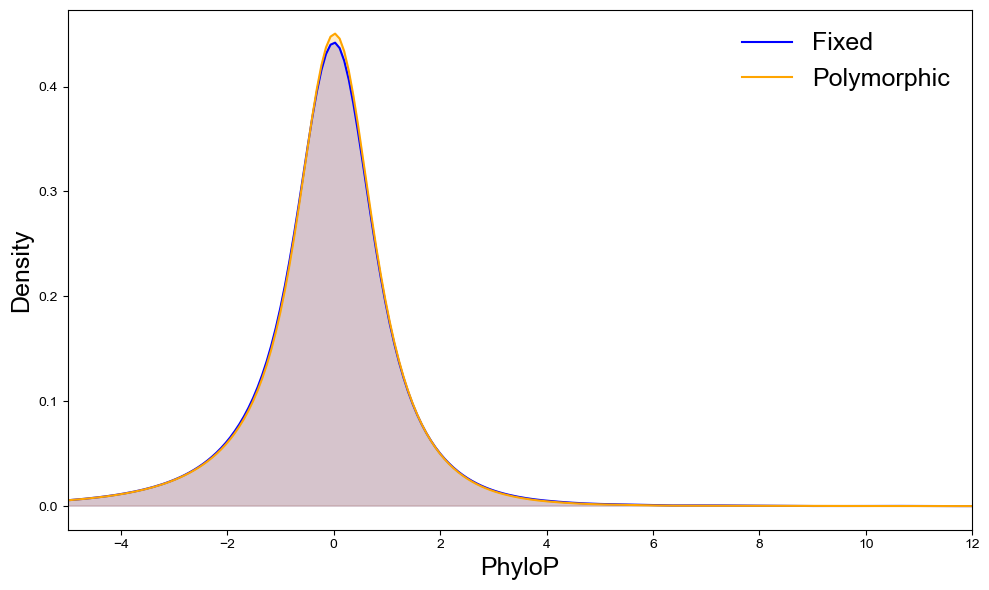

In [12]:
vv_use2 = vv_use[vv_use["UnfoldedMAF"] > 0.6]
vvv = prepare_alpha(v_use, vv_use2)
yvals2 = [np.float64(j) for j in list(vv_use2["PhyloP447"])]
yvals2.sort()
cuttt = 0.95
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, cutoff = cutoff, plot = True)
print(alpha)

C:\Users\astar\AppData\Local\Temp\ipykernel_13780\4153381598.py:28: RuntimeWarning: invalid value encountered in log
  return a + d*np.log(x + c)


0.07178010480776617


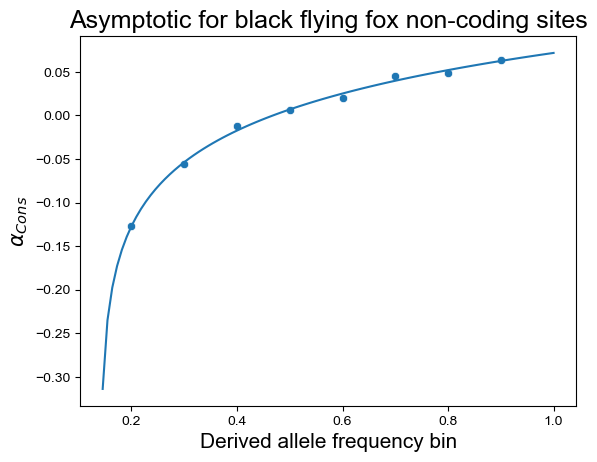

In [9]:
plot_stuff(to_plot, title = "Asymptotic for black flying fox non-coding sites", ylabel = "$\\alpha_{Cons}$", xlabel = "Derived allele frequency bin")
print(alpha)

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:145: RuntimeWarning: invalid value encountered in log
  return a + d*np.log(x + c)


(0.10651951720319566,
    AF bin     Alpha  Cutoff                [[dc1, du1], [pc1, pu1]]  \
 0     0.2 -0.087945   1.942  [[121048, 2504434], [207930, 3954219]]   
 1     0.3 -0.014887   1.875  [[129429, 2496053], [101620, 1930817]]   
 2     0.4  0.025030   1.838   [[134355, 2491127], [65137, 1238776]]   
 3     0.5  0.046173   1.818    [[137179, 2488303], [47457, 902605]]   
 4     0.6  0.061155   1.803    [[139300, 2486182], [38585, 733569]]   
 5     0.7  0.082201   1.782    [[142247, 2483235], [34707, 660185]]   
 6     0.8  0.087218   1.777    [[143025, 2482457], [29667, 564183]]   
 7     0.9  0.095152   1.769    [[144232, 2481250], [34467, 655385]]   
 
                  [[dc2, du2], [pc2, pu2]]  Num Poly in Bin  
 0  [[121189, 2504293], [208170, 3953979]]          4162149  
 1  [[129578, 2495904], [101718, 1930719]]          2032437  
 2   [[134493, 2490989], [65208, 1238705]]          1303913  
 3    [[137304, 2488178], [47511, 902551]]           950062  
 4    [[139430, 24

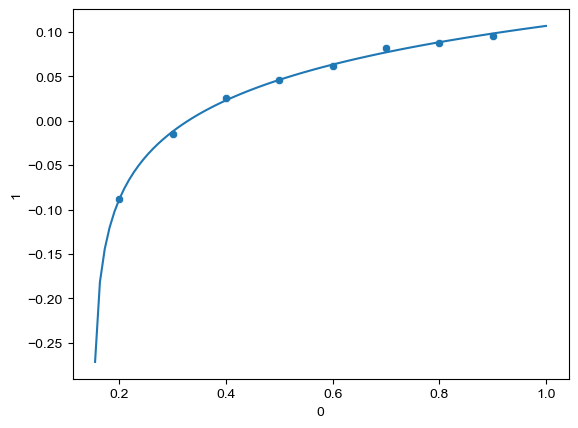

In [14]:
asymptotic_unfold_cutoff(v, vv, start = 0.1, dn_cut = 0.0001, to_plot_curve = True, cuttt = 0.95)

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:145: RuntimeWarning: invalid value encountered in log
  return a + d*np.log(x + c)


(0.21874140381203477,
    AF bin     Alpha  Cutoff        [[dc1, du1], [pc1, pu1]]  \
 0     0.2  0.014788   2.412  [[7632, 30086], [8672, 34690]]   
 1     0.3  0.092410   2.208  [[8142, 29576], [3967, 15875]]   
 2     0.4  0.118073   2.168   [[8326, 29392], [2481, 9938]]   
 3     0.5  0.132768   2.143   [[8437, 29281], [1858, 7434]]   
 4     0.6  0.145553   2.117   [[8538, 29180], [1418, 5673]]   
 5     0.7  0.191243   1.999   [[8900, 28818], [1232, 4940]]   
 6     0.8  0.246828   1.816   [[9399, 28319], [1075, 4302]]   
 7     0.9  0.174248   2.046   [[8765, 28953], [1250, 5005]]   
 
          [[dc2, du2], [pc2, pu2]]  Num Poly in Bin  
 0  [[7636, 30082], [8673, 34689]]            43362  
 1  [[8148, 29570], [3969, 15873]]            19842  
 2   [[8333, 29385], [2486, 9933]]            12419  
 3   [[8444, 29274], [1859, 7433]]             9292  
 4   [[8541, 29177], [1419, 5672]]             7091  
 5   [[8900, 28818], [1235, 4937]]             6172  
 6   [[9402, 28316], [

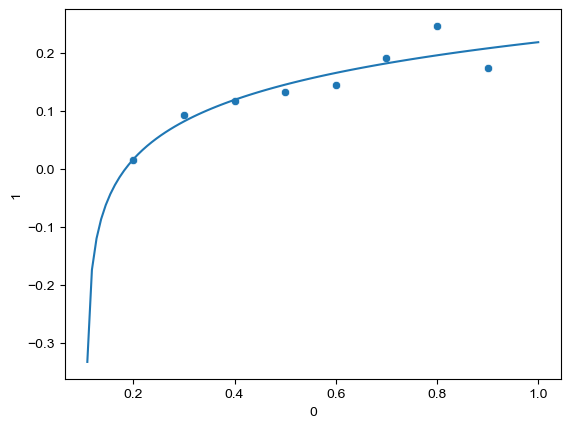

In [23]:
asymptotic_unfold_cutoff(v[v["NearestDist"] == 0], vv[vv["NearestDist"] == 0], start = 0.1, dn_cut = 0.0001, to_plot_curve = True, cuttt = 0.8)

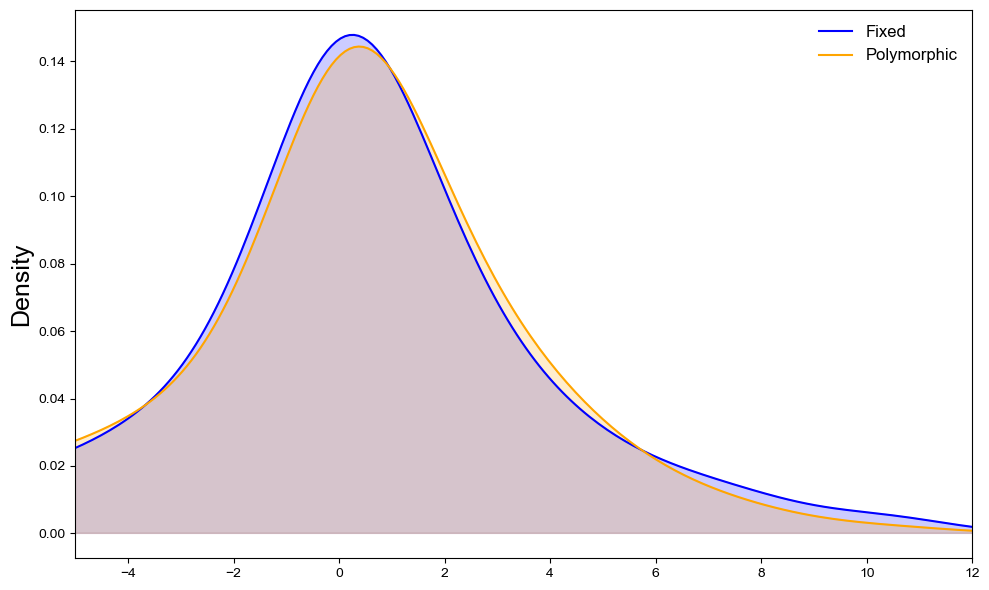

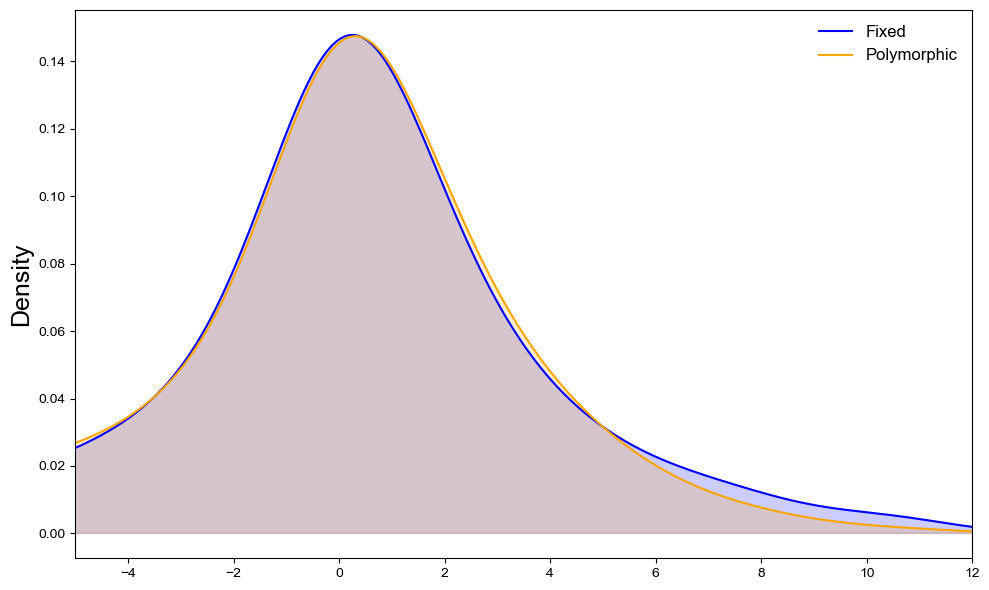

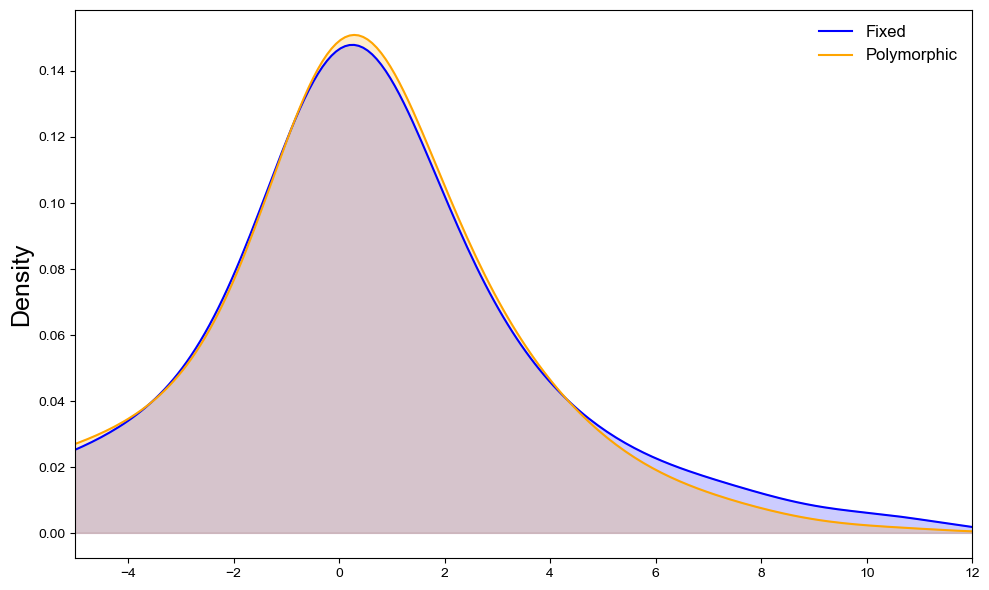

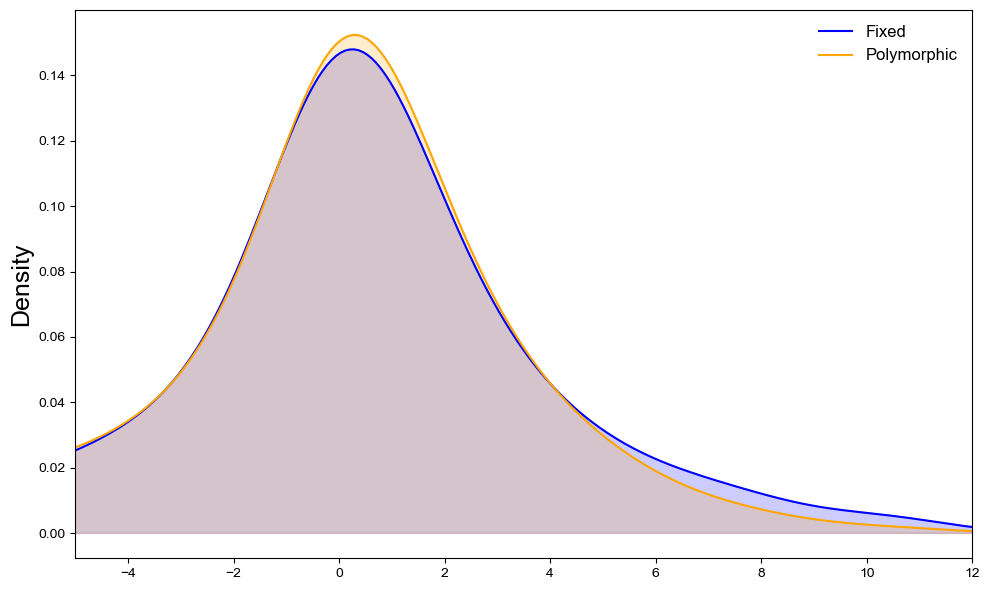

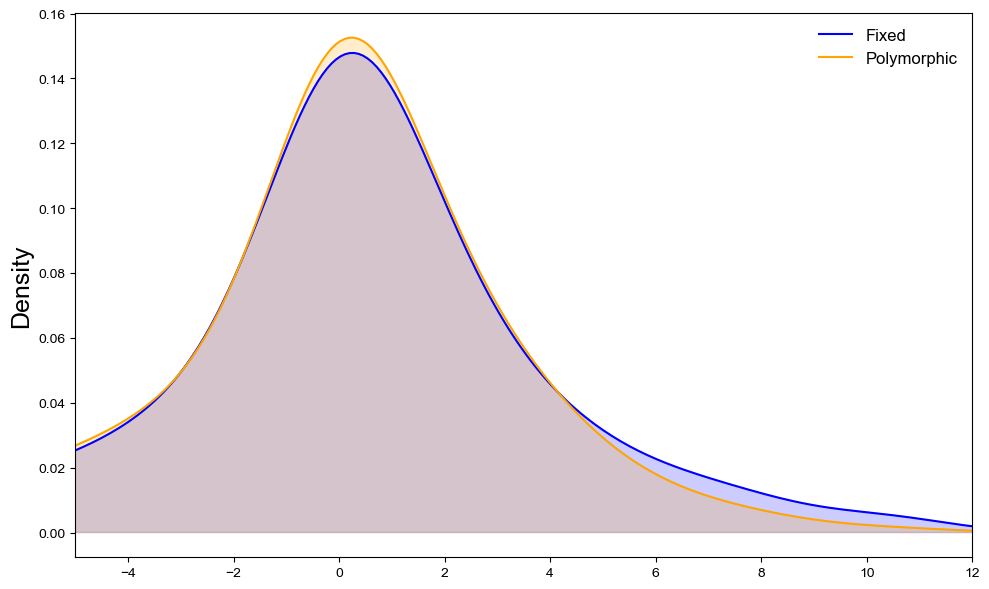

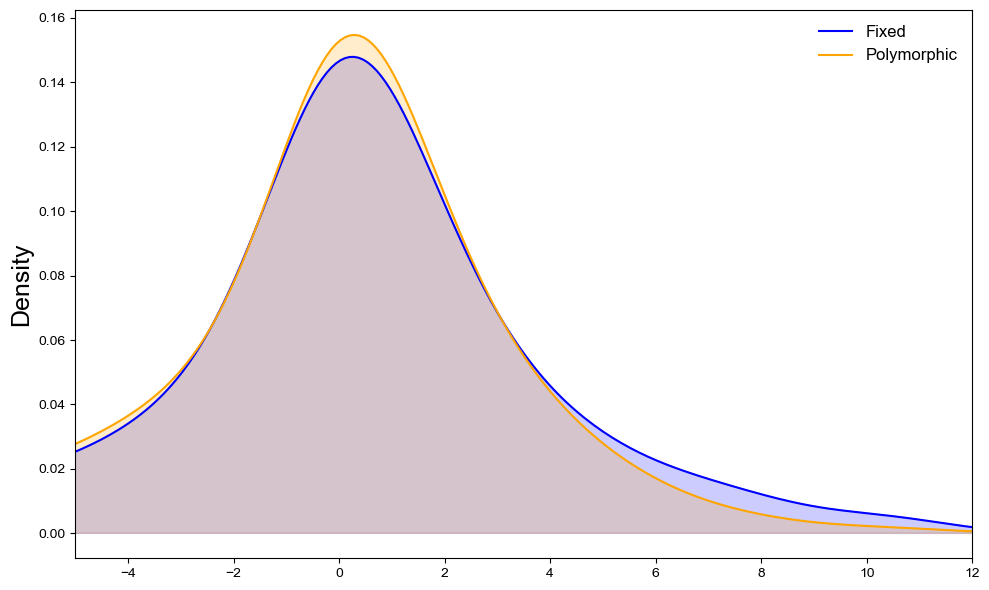

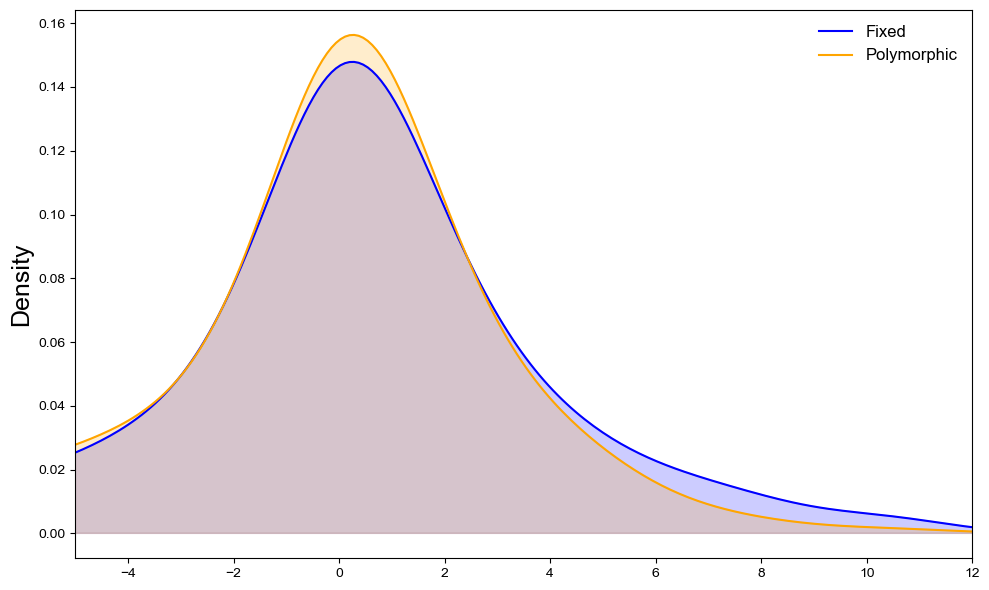

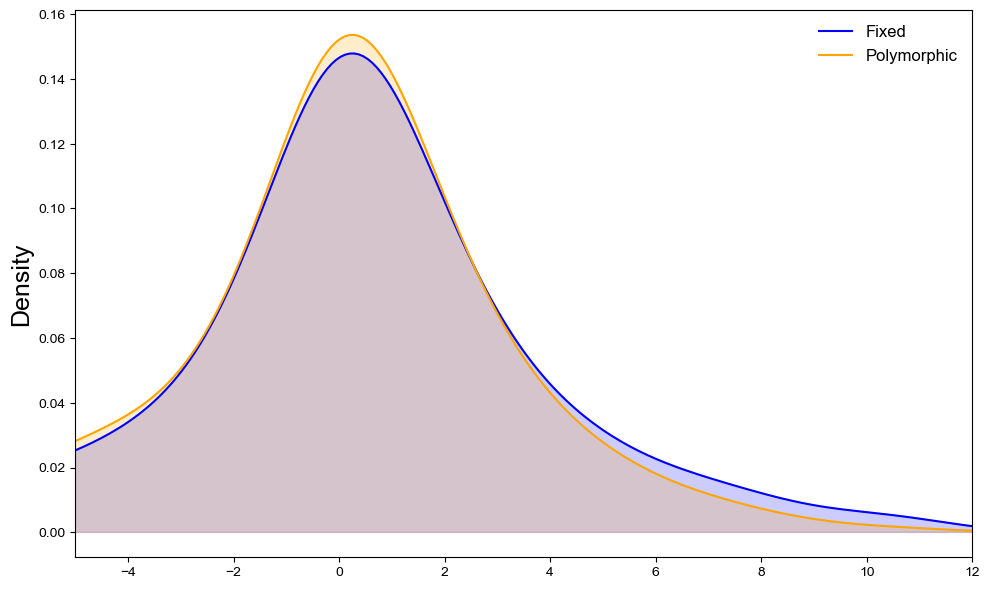

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:145: RuntimeWarning: invalid value encountered in log
  return a + d*np.log(x + c)


(0.1609593922971162,
    AF bin     Alpha  Cutoff          [[dc1, du1], [pc1, pu1]]  \
 0     0.2 -0.028911   1.391  [[11090, 26628], [13005, 30357]]   
 1     0.3  0.038667   1.297   [[11627, 26091], [5952, 13890]]   
 2     0.4  0.083596   1.207    [[12015, 25703], [3724, 8695]]   
 3     0.5  0.090202   1.193    [[12074, 25644], [2786, 6506]]   
 4     0.6  0.101014   1.171    [[12176, 25542], [2127, 4964]]   
 5     0.7  0.142470   1.091    [[12561, 25157], [1850, 4322]]   
 6     0.8  0.182458   1.011    [[12977, 24741], [1613, 3764]]   
 7     0.9  0.118987   1.134    [[12340, 25378], [1876, 4379]]   
 
            [[dc2, du2], [pc2, pu2]]  Num Poly in Bin  
 0  [[11090, 26628], [13010, 30352]]            43362  
 1   [[11633, 26085], [5953, 13889]]            19842  
 2    [[12018, 25700], [3726, 8693]]            12419  
 3    [[12077, 25641], [2788, 6504]]             9292  
 4    [[12179, 25539], [2128, 4963]]             7091  
 5    [[12569, 25149], [1852, 4320]]           

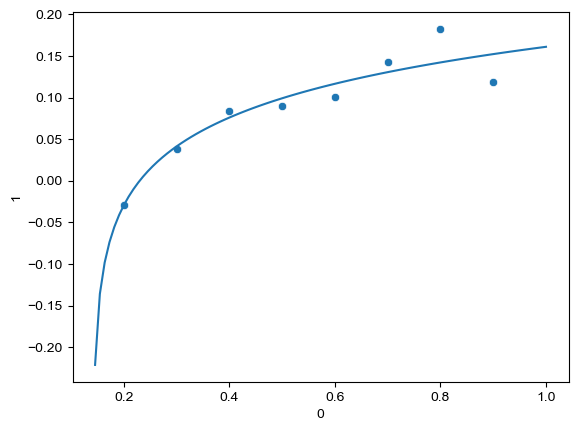

In [20]:
asymptotic_unfold_cutoff(v[v["NearestDist"] == 0], vv[vv["NearestDist"] == 0], start = 0.1, dn_cut = 0.0001, to_plot_curve = True, to_plot = True, cuttt = 0.7)

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:145: RuntimeWarning: invalid value encountered in log
  return a + d*np.log(x + c)


(0.08107558863092805,
    AF bin     Alpha  Cutoff                [[dc1, du1], [pc1, pu1]]  \
 0     0.2 -0.113917   1.903  [[116673, 2471091], [205801, 3912986]]   
 1     0.3 -0.041794   1.843  [[124349, 2463415], [100553, 1912042]]   
 2     0.4 -0.000186   1.807   [[129297, 2458467], [64541, 1226953]]   
 3     0.5  0.021742   1.787    [[132020, 2455744], [46999, 893771]]   
 4     0.6  0.034653   1.775    [[133717, 2454047], [38229, 726834]]   
 5     0.7  0.056814   1.755    [[136720, 2451044], [34425, 654295]]   
 6     0.8  0.059643   1.753    [[137036, 2450728], [29394, 559079]]   
 7     0.9  0.071011   1.743    [[138631, 2449133], [34150, 649447]]   
 
                  [[dc2, du2], [pc2, pu2]]  Num Poly in Bin  
 0  [[116798, 2470966], [206016, 3912771]]          4118787  
 1  [[124479, 2463285], [100653, 1911942]]          2012595  
 2   [[129439, 2458325], [64611, 1226883]]          1291494  
 3    [[132144, 2455620], [47053, 893717]]           940770  
 4    [[133857, 24

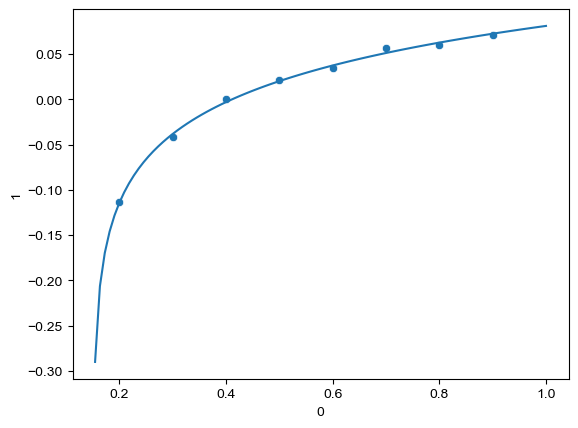

In [21]:
asymptotic_unfold_cutoff(v[v["NearestDist"] != 0], vv[vv["NearestDist"] != 0], start = 0.1, dn_cut = 0.0001, to_plot_curve = True, cuttt = 0.95)

In [38]:
v2 = v[v["NearestDist"] != 0]
vv2 = vv[vv["NearestDist"] != 0]
v2.index = v2["NearestGene"]
vv2.index = vv2["NearestGene"]
vv2 = vv2[(vv2["MAFMaxAcrossAncestry"] < 0.75) & (vv2["MAFMaxAcrossAncestry"] > 0.25)]


In [34]:
np.min(v["SpecSup447"])

301.0

In [39]:
metric = "PhyloP447"
c = 0
out = []

for gene in np.unique(np.intersect1d(v2["NearestGene"], vv2["NearestGene"])):
    if c%1000 == 0:
        print(c)
    vk = v2.loc[gene].copy()
    vvk = vv2.loc[gene].copy()
    if len(vk.index) >= 100 and len(vvk.index) >= 50:
        x2 = [np.float64(x) for x in list(vk[metric])]
        yvals2 = [np.float64(j) for j in list(vvk[metric])]
        yvals2.sort()
        vvv = prepare_alpha(vk, vvk, stat = metric)
        for cuttt in [0.5, 0.6, 0.7, 0.8, 0.9]:
            cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
            alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

            table1 = alpha[2]
            table2 = alpha[3]
            out.append([gene, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])

    c += 1


from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(5)
#df["FDR"] = fdrcorrection(df[5])[1]
df.columns = ["Gene", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
df.to_csv("Pteropus_alecto_PhyloP447_NonCoding_PerGene_SpecSup75_MAF0.25-0.75.csv", index = False)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [58]:
hpo = pd.read_csv("../DPSC_CNCC/HPO_AccelEvol_Input.txt", sep= "\t")
d_HPO = {}

for index, row in hpo.iterrows():
    d_HPO[row["Term"]] = row["Genes"].split(";")

In [ ]:
metric = "PhyloP447"
c = 0
out = []

for key in d_HPO.keys():
    if c%1000 == 0:
        print(c)
    if len(d_HPO[key]) > 15 and len(d_HPO[key]) < 100:
        vk = v2.loc[np.intersect1d(d_HPO[key], v2.index)].copy()
        vvk = vv2.loc[np.intersect1d(d_HPO[key], vv2.index)].copy()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            x2 = [np.float64(x) for x in list(vk[metric])]
            yvals2 = [np.float64(j) for j in list(vvk[metric])]
            yvals2.sort()
            vvv = prepare_alpha(vk, vvk, stat = metric)
            for cuttt in [0.5, 0.6, 0.7, 0.8, 0.9]:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
                out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])
                #print([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])

    c += 1


from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(5)
#df["FDR"] = fdrcorrection(df[5])[1]
df.columns = ["Gene", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
df.to_csv("Pteropus_alecto_PhyloP447_NonCoding_HPO_SpecSup75_MAF0.25-0.75_Intermediate.csv", index = False)


0
1000
2000
3000


KeyboardInterrupt: 

In [108]:
df = pd.DataFrame(out)
df = df.sort_values(7)
#df["FDR"] = fdrcorrection(df[5])[1]
df.columns = ["Gene", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
df.to_csv("Pteropus_alecto_PhyloP447_NonCoding_HPO_SpecSup75_MAF0.25-0.75_Intermediate.csv", index = False)


In [112]:
df[df["Proportion"] == 0.9]

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
1594,X-linked inheritance,0.164,24654,0.028,16837,1.163645e-26,7.974204e-97,5.823823e-27,3.987102e-97,0.285110,1.362,"[[3314, 21340], [1683, 15154]]","[[3318, 21336], [1684, 15153]]",0.9
1884,Spastic diplegia,0.139,6609,0.024,8115,1.502388e-21,2.103346e-26,8.068037e-22,1.051673e-26,0.381097,1.249,"[[1006, 5603], [811, 7304]]","[[1007, 5602], [813, 7302]]",0.9
6999,Transposition of the great arteries,0.086,7034,-0.005,11019,1.736970e-21,2.868724e-24,9.715263e-22,1.434362e-24,0.357700,1.186,"[[1037, 5997], [1101, 9918]]","[[1037, 5997], [1102, 9917]]",0.9
2494,Rectal prolapse,0.119,5213,-0.046,6443,6.537620e-20,1.002016e-38,3.783836e-20,5.010082e-39,0.401590,1.179,"[[815, 4398], [643, 5800]]","[[817, 4396], [645, 5798]]",0.9
1619,Cerebellar vermis hypoplasia,0.011,14091,-0.033,27349,1.853146e-19,3.072597e-14,1.035789e-19,1.536298e-14,0.254091,1.144,"[[1825, 12266], [2729, 24620]]","[[1825, 12266], [2735, 24614]]",0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,Vestibular dysfunction,-0.096,17840,-0.044,9407,3.138753e-14,4.866732e-08,1.000000e+00,1.000000e+00,-0.409832,1.143,"[[1302, 16538], [940, 8467]]","[[1304, 16536], [941, 8466]]",0.9
2319,Subcortical cerebral atrophy,-0.086,19422,-0.026,13170,1.209565e-15,5.640203e-14,1.000000e+00,1.000000e+00,-0.378124,1.192,"[[1448, 17974], [1316, 11854]]","[[1449, 17973], [1317, 11853]]",0.9
6529,Iris hypopigmentation,-0.083,22285,-0.031,19913,2.370590e-16,1.037463e-16,1.000000e+00,1.000000e+00,-0.326452,1.139,"[[1723, 20562], [1990, 17923]]","[[1724, 20561], [1995, 17918]]",0.9
5009,Scotoma,-0.093,18682,-0.042,12131,1.520734e-16,5.520669e-10,1.000000e+00,1.000000e+00,-0.410122,1.159,"[[1365, 17317], [1211, 10920]]","[[1365, 17317], [1216, 10915]]",0.9


In [70]:
df = pd.DataFrame(out)
df = df.sort_values(5)
#df["FDR"] = fdrcorrection(df[5])[1]
df.columns = ["Gene", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]

df = df[df["Proportion"] == 0.8]
df = df.sort_values("Fisher exact p-value; alt greater")
#df.to_csv("Bleh.csv")
df.head(50)

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
198,2-3 toe syndactyly,0.0930,27599,0.0340,31983,1.955840e-13,7.304436e-28,1.037310e-13,3.652218e-28,0.137385,0.761,"[[6194, 21405], [6388, 25595]]","[[6202, 21397], [6398, 25585]]",0.8
83,Hydroureter,0.0420,16262,0.0140,21621,1.098601e-10,2.876992e-09,5.569639e-11,1.438496e-09,0.150878,0.689,"[[3699, 12563], [4324, 17297]]","[[3705, 12557], [4332, 17289]]",0.8
253,Short distal phalanx of finger,0.0170,20892,-0.0120,37355,1.187391e-09,8.570580e-09,6.050766e-10,4.285290e-09,0.120900,0.661,"[[4622, 16270], [7463, 29892]]","[[4626, 16266], [7473, 29882]]",0.8
128,Small nail,-0.0030,10346,-0.0280,17238,1.513934e-07,8.213633e-05,7.846924e-08,4.106817e-05,0.147435,0.654,"[[2343, 8003], [3445, 13793]]","[[2348, 7998], [3449, 13789]]",0.8
243,Vertebral fusion,0.0700,6742,0.0220,6597,1.369063e-05,3.158386e-06,6.998198e-06,1.579193e-06,0.168132,0.736,"[[1557, 5185], [1318, 5279]]","[[1558, 5184], [1320, 5277]]",0.8
18,Parkinsonism,-0.0190,11891,-0.0380,23256,1.336540e-04,7.267539e-03,6.965220e-05,3.633769e-03,0.100474,0.619,"[[2585, 9306], [4649, 18607]]","[[2588, 9303], [4655, 18601]]",0.8
108,Renal cyst,0.0070,17591,-0.0010,27701,4.275169e-03,6.071979e-02,2.171910e-03,3.035989e-02,0.065996,0.686,"[[3713, 13878], [5537, 22164]]","[[3716, 13875], [5544, 22157]]",0.8
178,Short metacarpal,0.0140,20082,0.0080,32644,8.617231e-03,4.119609e-01,4.359274e-03,2.059805e-01,0.056854,0.692,"[[4204, 15878], [6519, 26125]]","[[4208, 15874], [6533, 26111]]",0.8
33,Postaxial hand polydactyly,-0.0050,15440,-0.0070,26845,9.455005e-03,2.491176e-01,4.909365e-03,1.245588e-01,0.062780,0.676,"[[3247, 12193], [5363, 21482]]","[[3252, 12188], [5369, 21476]]",0.8
103,Renal hypoplasia/aplasia,0.0290,17778,0.0090,26310,1.180348e-02,1.535088e-04,5.992147e-03,7.675438e-05,0.058892,0.714,"[[3729, 14049], [5257, 21053]]","[[3731, 14047], [5263, 21047]]",0.8


SignificanceResult(statistic=1.152414869352967, pvalue=0.3792068116296078)


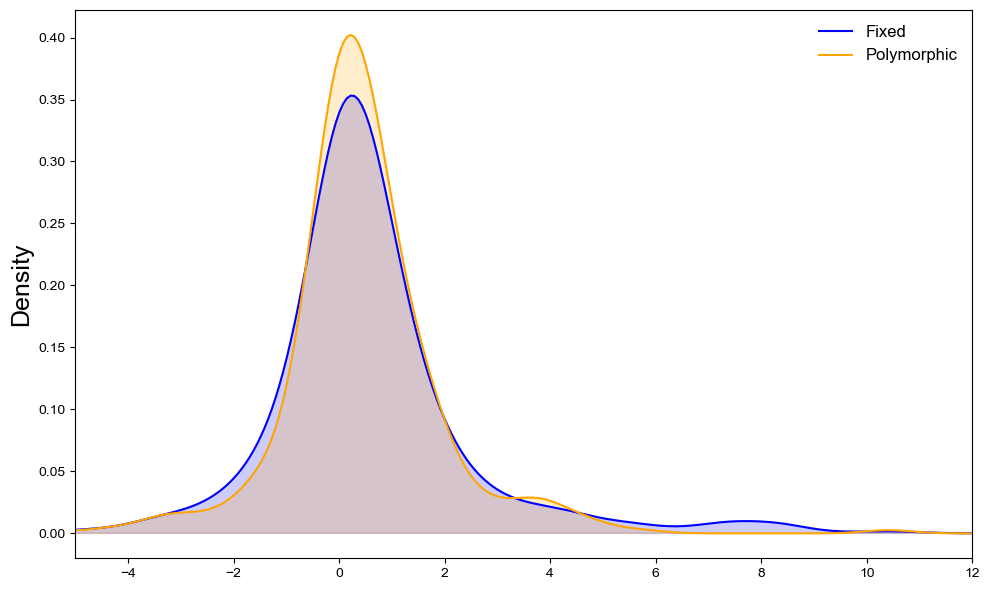

In [106]:
gene = "BCOR"
vk1 = v2.loc[gene].copy()
vvk1 = vv2.loc[gene].copy()
if len(vk1.index) >= 10 and len(vvk1.index) >= 10:
    x2 = [np.float64(x) for x in list(vk1[metric])]
    yvals2 = [np.float64(j) for j in list(vvk1[metric])]
    yvals2.sort()
    vvv = prepare_alpha(vk1, vvk1, stat = metric)
    cuttt = 0.8
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)
    print(fisher_exact(alpha[2]))

In [85]:
from scipy.stats import combine_pvalues
x = pd.read_csv("Pteropus_alecto_PhyloP447_NonCoding_PerGene_SpecSup75_MAF0.25-0.75.csv")
x = x[x["Proportion"] == 0.8]
x = x[x["Gene"].isin(d_HPO["2-3 toe syndactyly"])]
combine_pvalues(x[x["Gene"].isin(vk["NearestGene"])].sort_values("Fisher exact p-value; alt greater")["MWU p-value; alt greater"])

SignificanceResult(statistic=54.45260688984316, pvalue=0.9707272999150166)

In [101]:
x = x.sort_values("Fisher exact p-value; alt greater")

In [90]:
cv = Counter(vk["NearestGene"])
cvv = Counter(vvk["NearestGene"])

c = []
for key in cv.keys():
    c.append([key, cv[key], cvv[key]])
bleh = pd.DataFrame(c)
bleh["Rat"] = bleh[1]/bleh[2]
bleh.sort_values("Rat")

,0,1,2,Rat
27,GDI1,3,32,0.093750
8,BHLHA9,37,260,0.142308
66,TXNL4A,11,54,0.203704
18,DHCR7,56,249,0.224900
17,DDX11,53,226,0.234513
...,...,...,...,...
21,EBP,15,3,5.000000
3,ALG13,193,37,5.216216
0,ACSL4,572,104,5.500000
69,USP9X,605,83,7.289157


In [111]:
vk

,Position,Alecto,Vampyrus,Rousettus,Helvum,PhyloP447,NearestGene,NearestDist,SpecSup447,Derived,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
NearestGene,,,,,,,,,,,,,
ADGRG2,KB030639:3992649,C,T,T,T,0.036,ADGRG2,84120,402.0,AlectoDerived,Fixed,.,.
ADGRG2,KB030639:3999356,G,A,A,G,0.000,ADGRG2,77413,393.0,AlectoDerived,Fixed,.,.
ADGRG2,KB030639:3999461,C,T,T,C,0.250,ADGRG2,77308,399.0,AlectoDerived,Fixed,.,.
ADGRG2,KB030639:3999634,A,G,G,G,0.589,ADGRG2,77135,369.0,AlectoDerived,Fixed,.,.
ADGRG2,KB030639:3999902,T,C,C,T,-0.430,ADGRG2,76867,374.0,AlectoDerived,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF711,KB030756:908659,T,G,G,G,-0.329,ZNF711,189,412.0,AlectoDerived,Fixed,.,.
ZNF711,KB030756:908807,G,A,A,A,-0.510,ZNF711,41,437.0,AlectoDerived,Fixed,.,.
ZNF711,KB030756:909141,T,C,C,C,0.647,ZNF711,150,422.0,AlectoDerived,Fixed,.,.


In [125]:
Counter(vvk["NearestGene"])

Counter({'AHI1': 817,
         'ALX4': 633,
         'ARL13B': 112,
         'ARL3': 99,
         'ARMC9': 601,
         'ASXL3': 325,
         'ATN1': 15,
         'ATP2B3': 159,
         'ATR': 27,
         'B9D1': 43,
         'CC2D2A': 599,
         'CENPF': 909,
         'CEP104': 94,
         'CEP120': 214,
         'CEP164': 64,
         'CEP290': 152,
         'CEP41': 184,
         'COG1': 68,
         'CPLANE1': 351,
         'CSPP1': 209,
         'CWF19L1': 18,
         'DAG1': 59,
         'DCHS1': 71,
         'EPG5': 354,
         'EXOSC8': 4,
         'FAM149B1': 116,
         'FAT4': 1727,
         'FKRP': 24,
         'FOXC1': 64,
         'GMPPB': 2,
         'GPC3': 102,
         'GPC4': 3,
         'GRIA3': 36,
         'HYLS1': 16,
         'IFT172': 155,
         'INPP5E': 14,
         'KIAA0586': 483,
         'KIAA0753': 81,
         'KIF7': 39,
         'LAMA1': 926,
         'LARGE1': 4491,
         'MKS1': 90,
         'MPL': 48,
         'MRE11': 173,
     

SignificanceResult(statistic=0.7951247484909457, pvalue=0.02530375587077564)


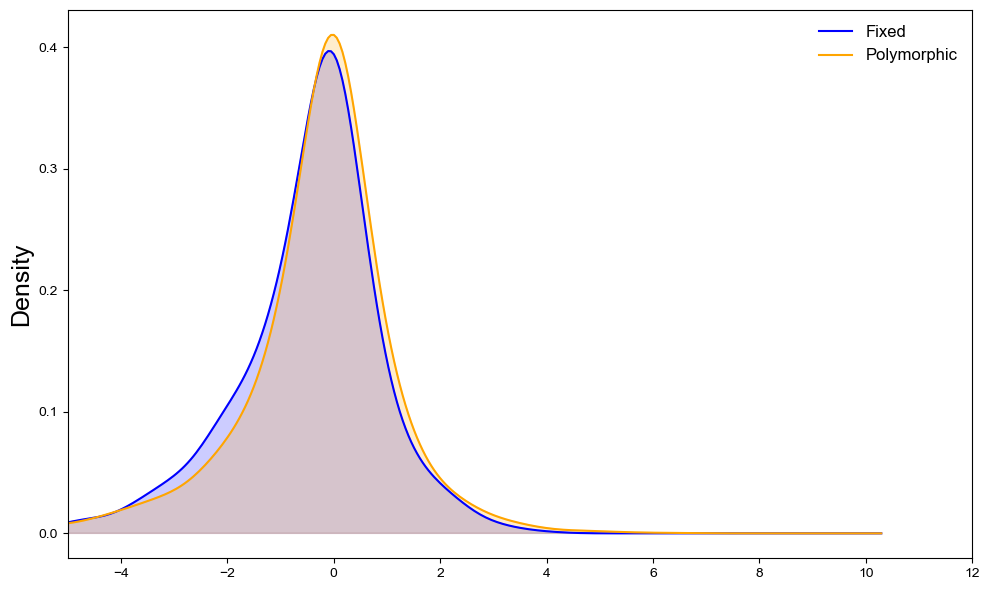

In [119]:
vk = v2.loc[["FRMD4A"]].copy()
vvk = vv2.loc[["FRMD4A"]].copy()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    x2 = [np.float64(x) for x in list(vk[metric])]
    yvals2 = [np.float64(j) for j in list(vvk[metric])]
    yvals2.sort()
    vvv = prepare_alpha(vk, vvk, stat = metric)
    cuttt = 0.8
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)
    print(fisher_exact(alpha[2]))

SignificanceResult(statistic=1.3022662232191198, pvalue=0.2652839180174831)


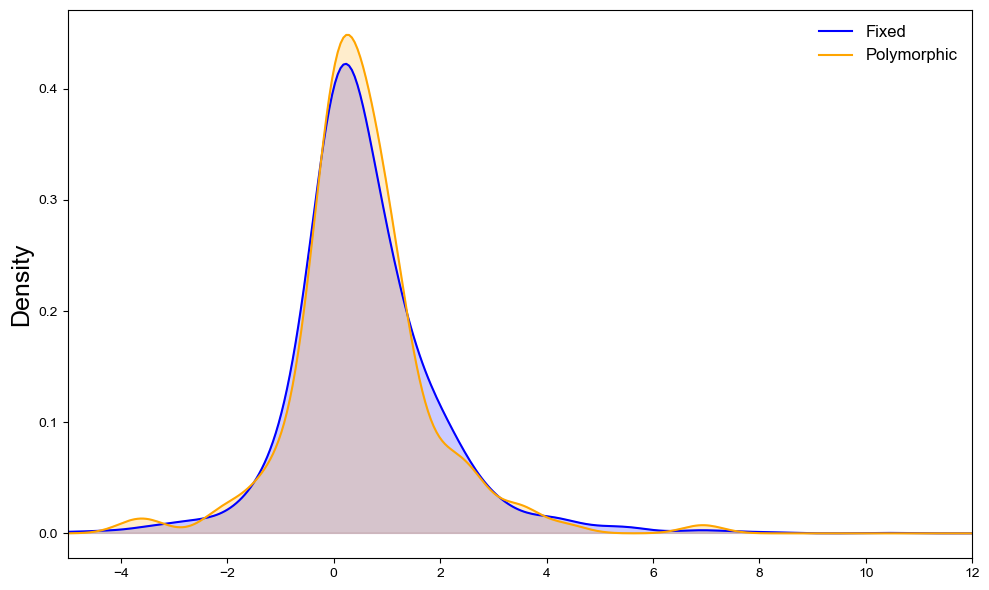

In [120]:
vk = v2.loc[["GPC3", "GPC4", "GRIA3"]].copy()
vvk = vv2.loc[["GPC3", "GPC4", "GRIA3"]].copy()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    x2 = [np.float64(x) for x in list(vk[metric])]
    yvals2 = [np.float64(j) for j in list(vvk[metric])]
    yvals2.sort()
    vvv = prepare_alpha(vk, vvk, stat = metric)
    cuttt = 0.8
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)
    print(fisher_exact(alpha[2]))

In [123]:
Counter(vvk["NearestGene"])

Counter({'GPC3': 102, 'GPC4': 3, 'GRIA3': 36, 'FRMD4A': 3553})

SignificanceResult(statistic=2.0922105013433425, pvalue=1.0516437738897598e-52)


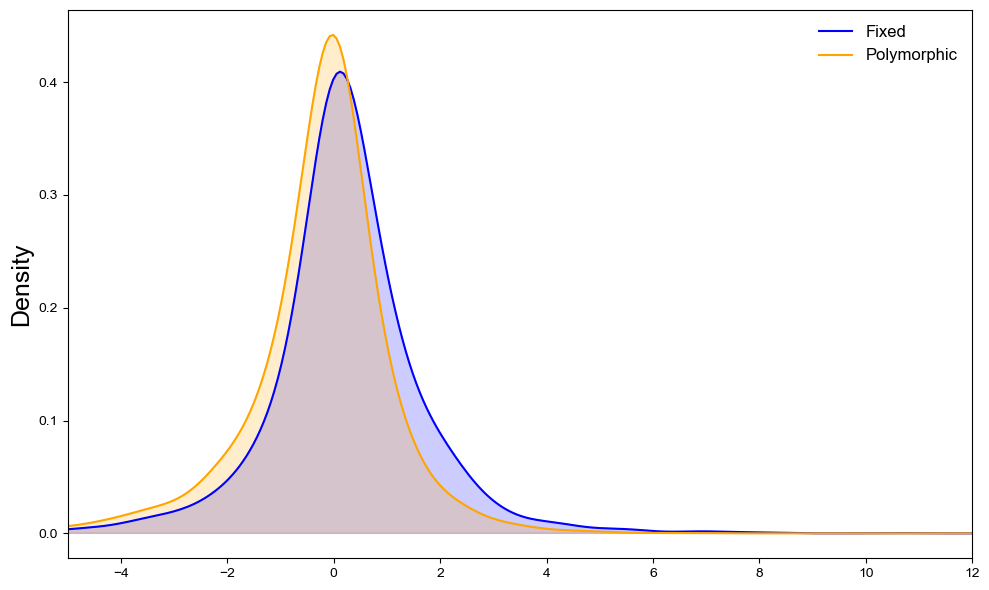

In [126]:
vk = v2.loc[["GPC3", "GPC4", "GRIA3", "FRMD4A", "FAT4"]].copy()
vvk = vv2.loc[["GPC3", "GPC4", "GRIA3", "FRMD4A", "FAT4"]].copy()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    x2 = [np.float64(x) for x in list(vk[metric])]
    yvals2 = [np.float64(j) for j in list(vvk[metric])]
    yvals2.sort()
    vvv = prepare_alpha(vk, vvk, stat = metric)
    cuttt = 0.8
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)
    print(fisher_exact(alpha[2]))

SignificanceResult(statistic=1.3507247908195645, pvalue=7.24839028046999e-36)


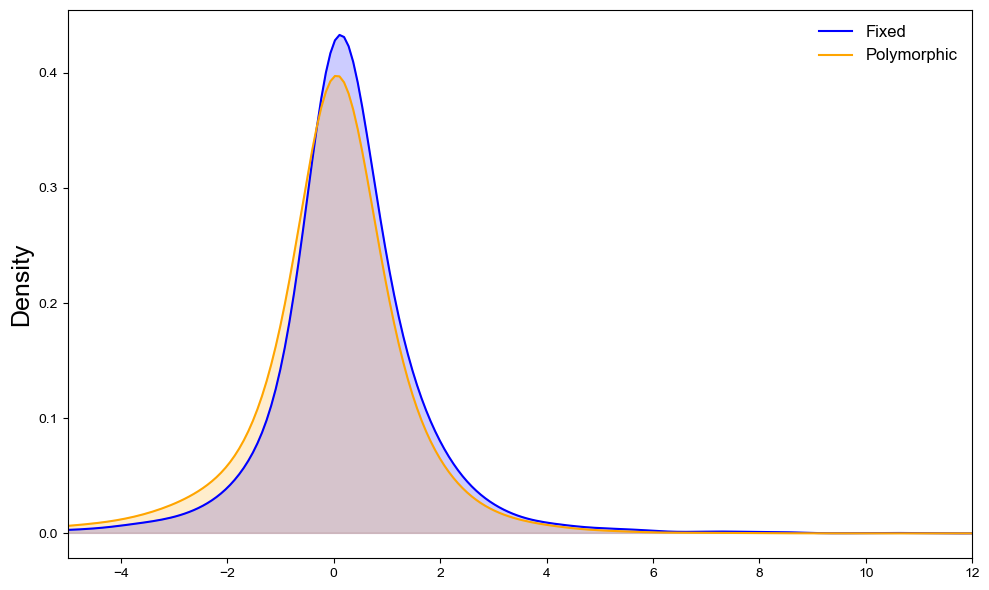

In [137]:
key = "X-linked inheritance"
vk = v2.loc[np.intersect1d(d_HPO[key], v2.index)].copy()
vvk = vv2.loc[np.intersect1d(d_HPO[key], vv2.index)].copy()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    x2 = [np.float64(x) for x in list(vk[metric])]
    yvals2 = [np.float64(j) for j in list(vvk[metric])]
    yvals2.sort()
    vvv = prepare_alpha(vk, vvk, stat = metric)
    cuttt = 0.8
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)
    print(fisher_exact(alpha[2]))

In [105]:
np.setdiff1d(np.intersect1d(d_HPO[key], v2.index), x.head(10)["Gene"])

array(['ADNP', 'AGTR2', 'ALG13', 'ARCN1', 'ARHGEF6', 'ARX', 'BHLHA9',
       'BMP2', 'BMPR1B', 'CDC45', 'CEP55', 'CERT1', 'CLCF1', 'CLCN4',
       'DDX11', 'DHCR7', 'DLG3', 'DMD', 'EBP', 'FGFR2', 'FRMPD4', 'FTSJ1',
       'GDF5', 'GDI1', 'GNE', 'HCFC1', 'HOXD13', 'IL11RA', 'IL1RAPL1',
       'IQSEC2', 'KCTD1', 'LMBR1', 'MAN1B1', 'MECP2', 'MED12', 'MEIS2',
       'MID2', 'MYCN', 'NEDD4L', 'NIPBL', 'PAK3', 'PIGY', 'POLR3A',
       'PSMD12', 'PTCHD1', 'RAB39B', 'SALL1', 'SETD5', 'SHANK3',
       'SLC12A6', 'SLC9A7', 'SOX5', 'SYP', 'TBX15', 'TRIO', 'TSPAN7',
       'TXNL4A', 'UPF3B', 'USP27X', 'USP9X', 'ZNF41', 'ZNF711'],
      dtype=object)

In [138]:
x = Counter(vk["NearestGene"])
y = Counter(vvk["NearestGene"])
keep = []
for key in x.keys():
    if np.abs(np.log2(x[key]/y[key])) < 1:
        keep.append(key)

SignificanceResult(statistic=1.3507247908195645, pvalue=7.24839028046999e-36)


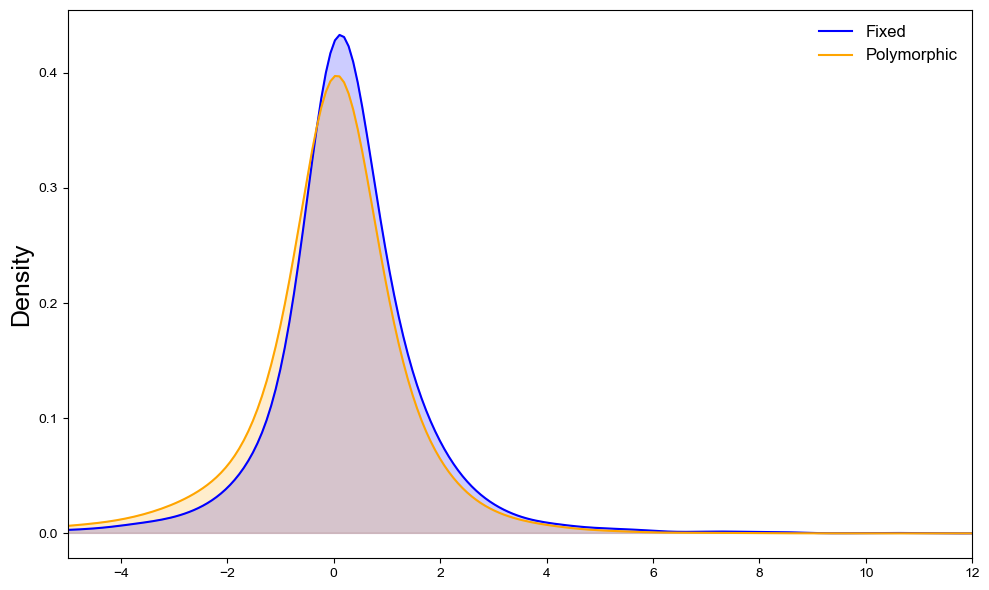

In [139]:
key = "X-linked inheritance"
vk = v2.loc[np.setdiff1d(np.intersect1d(d_HPO[key], v2.index), ["FRMD4A", "FAT4", "PSAT1", "ZNF423", "LARGE1"])].copy()
vvk = vv2.loc[np.setdiff1d(np.intersect1d(d_HPO[key], vv2.index), ["FRMD4A", "FAT4", "PSAT1", "ZNF423", "LARGE1"])].copy()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    x2 = [np.float64(x) for x in list(vk[metric])]
    yvals2 = [np.float64(j) for j in list(vvk[metric])]
    yvals2.sort()
    vvv = prepare_alpha(vk, vvk, stat = metric)
    cuttt = 0.8
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)
    print(fisher_exact(alpha[2]))

SignificanceResult(statistic=1.0116662245619157, pvalue=0.8820981453619126)


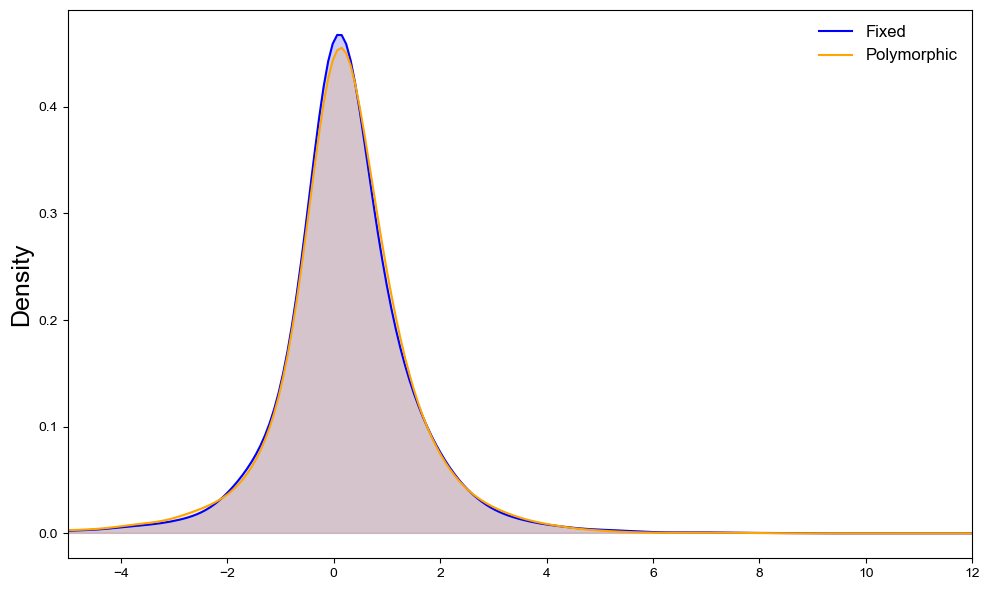

In [140]:
key = "X-linked inheritance"
vk = v2.loc[np.intersect1d(np.intersect1d(d_HPO[key], v2.index), keep)].copy()
vvk = vv2.loc[np.intersect1d(np.intersect1d(d_HPO[key], vv2.index), keep)].copy()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    x2 = [np.float64(x) for x in list(vk[metric])]
    yvals2 = [np.float64(j) for j in list(vvk[metric])]
    yvals2.sort()
    vvv = prepare_alpha(vk, vvk, stat = metric)
    cuttt = 0.95
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)
    print(fisher_exact(alpha[2]))

In [66]:
from collections import Counter
Counter(vk["NearestGene"])

Counter({'ACSL4': 572,
         'ADNP': 35,
         'AGTR2': 174,
         'ALG13': 193,
         'ARCN1': 15,
         'ARHGEF6': 165,
         'ARX': 839,
         'BCOR': 1439,
         'BHLHA9': 37,
         'BMP2': 897,
         'BMPR1B': 256,
         'CDC45': 34,
         'CEP55': 30,
         'CERT1': 89,
         'CLCF1': 15,
         'CLCN4': 221,
         'CNKSR2': 902,
         'DDX11': 53,
         'DHCR7': 56,
         'DLG3': 205,
         'DMD': 3253,
         'EBP': 15,
         'FGFR1': 234,
         'FGFR2': 598,
         'FRMPD4': 1665,
         'FTSJ1': 35,
         'GDF5': 24,
         'GDI1': 3,
         'GNE': 48,
         'HCFC1': 65,
         'HOXD13': 11,
         'IL11RA': 14,
         'IL1RAPL1': 2789,
         'IQSEC2': 187,
         'KCTD1': 248,
         'LMBR1': 139,
         'MAN1B1': 31,
         'MECP2': 177,
         'MED12': 62,
         'MEIS2': 481,
         'MID2': 246,
         'MYCN': 467,
         'NEDD4L': 618,
         'NIPBL': 405,
      